# Task 2: Scikit-learn’s Perceptron algorithm

In this task, there will be and exploration Scikit-learn’s ```Perceptron``` model to classify two classes of the Iris dataset: *Iris-setosa* and *Iris-virginica*. There will be a visualization of the dataset, training of the model, evaluation of its accuracy, and plotting of the decision boundary.

## 1a. Import Dependencies

In [8]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

## 1b. Read the Iris Dataset using Pandas

In [9]:
# Read the CSV
df = pd.read_csv('iris_data.csv')

# Display the first rows to check 
df.head()

,sepal_length,sepa_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 2. Extract the samples

In this section, a filter will be applied on the dataset, in order to include samples of *Iris-setosa* and *Iris-virginica*. Then, there will be an extraction of the interested features (*petal length* and *petal width*) to create the matrix ```X```. Finally, the ```y``` is created by mapping the two flower species to binary labels: $1$ for *Iris-virginica* and $0$ for *Iris-setosa*.

In [10]:
# Filter for Iris-setosa and Iris-virginica
df_filtered = df[df['class'].isin(['Iris-setosa', 'Iris-virginica'])]

# Extract petal length and petal width as features
X = df_filtered[['petal_length', 'petal_width']].values

# Extract the target species and convert to binary labels
y = df_filtered['class'].apply(lambda x: 1 if x == 'Iris-virginica' else 0).values

## 3. Plot the dataset as a scatter plot

The dataset is visualized thanks to a scatter plot, where the *petal length* is plotted in the x-axis and the *petal-width* is on the y-axis. The two species are represented using different colors, helping understand how the two classes are distributed based on these features.

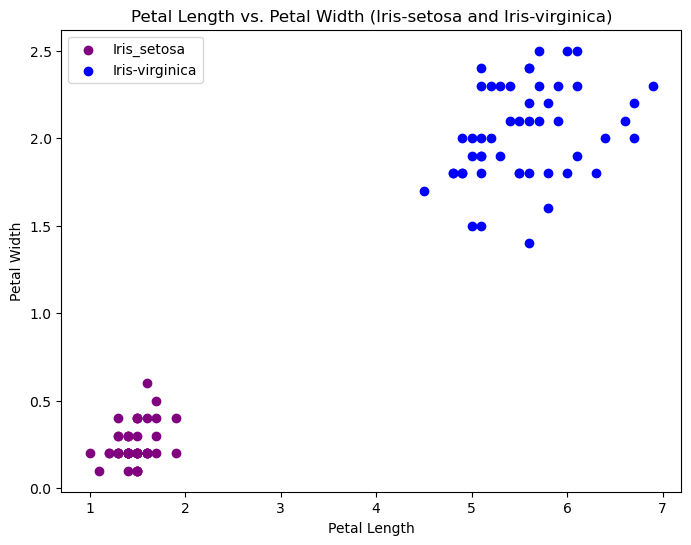

In [11]:
# Plot the scatter plot with different colors for the two species
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='purple', label='Iris_setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Iris-virginica')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.title('Petal Length vs. Petal Width (Iris-setosa and Iris-virginica)')
plt.show()

## 3a. Split the Dataset into training/testing sets

Splitting the data into $20\%$ of testing set and the remaining part as test set is an important step to evaluate the model's performance on unseen data. After splitting, a ```StandardScaler``` will be applied to standardize the features. Scaling is particularly important for algorithms like the Perceptron, which are sensistive to feature sizes.

In [12]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4. Train the Perceptron model using Scikit-learn

An instance of the Perceptron model is created from Scikit-learn and it will be trained using the scaled training data. The model's convergence is displayed by setting ```verbose=1```: it seems obvious, by looking at the results, that the model converges after few epochs, so very quickly.
After training, there will be a model's evaluation using the *accuracy* value.

In [13]:
# Train the Perceptron
perceptron = Perceptron(verbose=1)
perceptron.fit(X_train_scaled, y_train)

# Evaluate the model on test data
accuracy = perceptron.score(X_test_scaled, y_test)
print(f"\nTest Accuracy: {accuracy:.2f}")

-- Epoch 1
Norm: 1.26, NNZs: 2, Bias: 1.000000, T: 80, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.26, NNZs: 2, Bias: 1.000000, T: 160, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 2, Bias: 1.000000, T: 240, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.26, NNZs: 2, Bias: 1.000000, T: 320, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.26, NNZs: 2, Bias: 1.000000, T: 400, Avg. loss: 0.000000
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.26, NNZs: 2, Bias: 1.000000, T: 480, Avg. loss: 0.000000
Total training time: 0.00 seconds.
Convergence after 6 epochs took 0.00 seconds

Test Accuracy: 1.00


## 4a. Evaluate the model

In this section there is a further evaluation of the model using two key metrics:

- **Confusion matrix**: Provides a summary of the correct and incorrect predictions, showing how many of each class were misclassified.

- **Classification report**: Offers precision, recall, F1-score and support for each class. This gives a detailed breakdown of the model's performance for both *Iris-setosa* and *Iris-virginica*.

Confusion Matrix:


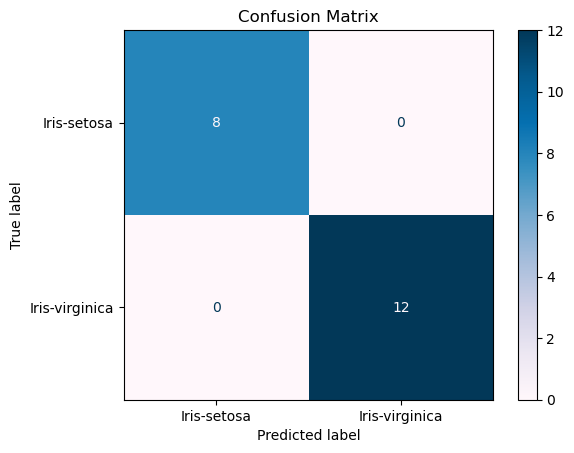


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [14]:
# Generate predictions
y_pred = perceptron.predict(X_test_scaled)

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Iris-setosa', 'Iris-virginica'])
disp.plot(cmap='PuBu', values_format='d')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(class_report)

## 5. Plot the Decision Boundary using random inputs

Finally, there is a visualization of the decision boundary for the trained Perceptron model. A mesh grid is created to represent different possible inputs. The model is used to predict labels for these inputs, and the decision boundary is plotted. The scatter plot of the training data is overlaid to show how the decision boundary separates Iris-setosa from Iris-virginica. This provides a clear visual representation of the model's classification regions.

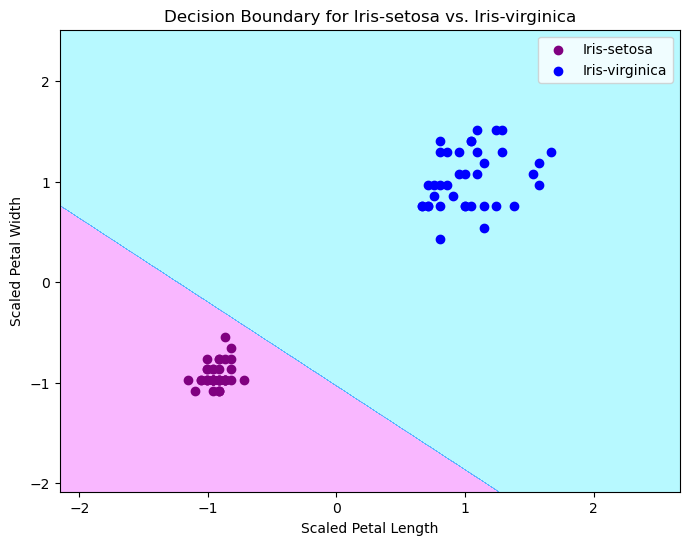

In [15]:
# Generate a mesh grid of points
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 5000), np.linspace(y_min, y_max, 5000))

# Predict on the grid
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='cool_r')
plt.scatter(X_train_scaled[y_train == 0, 0], X_train_scaled[y_train == 0, 1], color='purple', label='Iris-setosa')
plt.scatter(X_train_scaled[y_train == 1, 0], X_train_scaled[y_train == 1, 1], color='blue', label='Iris-virginica')
plt.xlabel('Scaled Petal Length')
plt.ylabel('Scaled Petal Width')
plt.legend()
plt.title('Decision Boundary for Iris-setosa vs. Iris-virginica')
plt.show()

## 6. Conclusions

This task involved implementing a Perceptron model using ```Scikit-learn``` to classify two species from the Iris dataset: *Iris-setosa* and *Iris-virginica*, based on *petal length* and *petal width*. After visualizing the dataset and applying feature scaling, the Perceptron model was trained, and it was observed that the model converged quickly. This was expected due to the simplicity of the dataset and the linear separability of the two classes.

The model demonstrated high accuracy on the test set, and the decision boundary plot provided a visual confirmation of the effective separation between the two species. The confusion matrix and classification report further illustrated balanced performance between the two classes.

In conclusion, the Perceptron algorithm, despite its simplicity, proved to be an effective linear classifier for this binary classification task. For more complex datasets where classes are not linearly separable, more advanced techniques would be necessary to achieve better performance.